In [1]:
import pandas as pd
from scipy import spatial
import numpy as np

In [2]:
density = pd.read_csv('Density.csv', decimal=',', delimiter=';')
density.head()

,Num,Date,Time,Latitude,Longitude,cm0,cm1,cm2,cm3,cm4,...,cm51,cm52,cm53,cm54,cm55,cm56,cm57,cm58,cm59,cm60
0,0,20.04.2024,2:47:26,54.003710,77.258102,0,0,0,0,0,...,2798.0,2690.0,2771.0,2869.0,3030.0,3078.0,2982.0,2977.0,2992.0,3134.0
1,1,20.04.2024,2:52:43,54.003068,77.259158,0,9,22,70,87,...,2236.0,2279.0,2185.0,2096.0,2069.0,1988.0,1962.0,1978.0,1964.0,1950.0
2,2,20.04.2024,2:56:15,54.004348,77.257878,0,0,0,419,512,...,2221.0,2270.0,2234.0,2159.0,2149.0,2146.0,2136.0,2169.0,2237.0,2322.0
3,3,21.04.2024,1:49:44,54.004519,77.256945,0,0,0,0,311,...,3070.0,3083.0,3103.0,3199.0,3299.0,3404.0,3484.0,3641.0,3705.0,3815.0
4,4,21.04.2024,1:53:50,54.004908,77.254429,0,0,0,0,0,...,1770.0,1816.0,1934.0,2255.0,2455.0,2698.0,2841.0,2852.0,2992.0,3255.0


In [3]:
density04= density.loc[density['Date'].str.contains(".04.", na=False)]
density06= density.loc[density['Date'].str.contains(".06.", na=False)]
density09= density.loc[density['Date'].str.contains(".09.", na=False)]
density06.reset_index(drop=True, inplace=True)
density09.reset_index(drop=True, inplace=True)
density06.head()

,Num,Date,Time,Latitude,Longitude,cm0,cm1,cm2,cm3,cm4,...,cm51,cm52,cm53,cm54,cm55,cm56,cm57,cm58,cm59,cm60
0,93,09.06.2024,2:14:14,54.003153,77.258946,0,0,0,0,0,...,2438.0,2387.0,2378.0,2363.0,2356.0,2344.0,2321.0,2296.0,2242.0,2252.0
1,94,09.06.2024,2:18:31,54.003806,77.257885,0,0,0,364,555,...,2027.0,2267.0,2285.0,2316.0,2368.0,2430.0,2475.0,2508.0,2535.0,2588.0
2,95,09.06.2024,2:21:41,54.004467,77.257096,0,0,0,0,0,...,4657.0,4859.0,4702.0,4831.0,4644.0,4416.0,4038.0,3794.0,3805.0,3913.0
3,96,09.06.2024,2:25:55,54.004879,77.254428,0,0,0,0,148,...,2525.0,2541.0,2530.0,2527.0,2486.0,2455.0,2433.0,2385.0,2179.0,2024.0
4,97,09.06.2024,2:29:10,54.004110,77.255573,0,0,0,173,202,...,3124.0,3105.0,3188.0,3183.0,3284.0,3349.0,3429.0,3554.0,3618.0,3570.0


In [4]:
harvest = pd.read_csv('Harvest.csv', decimal=',', delimiter=';')
harvest.head()

,Latitude_h,Longitude_h,Dens,Val,CGa
0,53.995493,77.245693,1344.5,0.52,74.29
1,53.998058,77.245788,1543.3,1.68,240.00
2,53.996163,77.249992,1879.0,1.18,168.57
3,53.996304,77.245000,1928.9,1.60,228.57
4,53.998670,77.246929,1971.9,0.92,131.43


In [5]:
harvest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Latitude_h   48 non-null     float64
 1   Longitude_h  48 non-null     float64
 2   Dens         48 non-null     float64
 3   Val          48 non-null     float64
 4   CGa          48 non-null     float64
dtypes: float64(5)
memory usage: 2.0 KB


In [6]:
harvest['CGa'].describe()

count     48.000000
mean     220.536250
std       89.401654
min       74.290000
25%      154.290000
50%      221.430000
75%      264.282500
max      477.140000
Name: CGa, dtype: float64

In [7]:
harvest_array = harvest[['Latitude_h','Longitude_h']].to_numpy()

In [8]:
density_array04 = density04[['Latitude','Longitude']].to_numpy()
density_array06 = density06[['Latitude','Longitude']].to_numpy()
density_array09 = density09[['Latitude','Longitude']].to_numpy()

In [9]:
tree04 = spatial.KDTree(density_array04)
tree06 = spatial.KDTree(density_array06)
tree09 = spatial.KDTree(density_array09)

In [10]:
data_pred_04 = pd.DataFrame()
for point in harvest_array:
    #print(point)
    query_point = point
    distance, index = tree04.query(query_point)  # Find the nearest neighbor
    nearest_point = density_array04[index]
    curr_df = density04.loc[[index]]
    data_pred_04 = pd.concat([data_pred_04, curr_df], ignore_index=True)

    
data_pred_06 = pd.DataFrame()
for point in harvest_array:
    #print(point)
    query_point = point
    distance, index = tree06.query(query_point)  # Find the nearest neighbor
    nearest_point = density_array06[index]
    #print(index)
    curr_df = density06.loc[[index]]
    data_pred_06 = pd.concat([data_pred_06, curr_df], ignore_index=True)
    
data_pred_09 = pd.DataFrame()
for point in harvest_array:
    #print(point)
    query_point = point
    distance, index = tree09.query(query_point)  # Find the nearest neighbor
    nearest_point = density_array09[index]
    curr_df = density09.loc[[index]]
    data_pred_09 = pd.concat([data_pred_09, curr_df], ignore_index=True)

In [11]:
data_pred_04.head()

,Num,Date,Time,Latitude,Longitude,cm0,cm1,cm2,cm3,cm4,...,cm51,cm52,cm53,cm54,cm55,cm56,cm57,cm58,cm59,cm60
0,76,21.04.2024,7:12:54,53.995401,77.245908,0,0,0,0,0,...,3026.0,3036.0,2973.0,2925.0,2969.0,3008.0,2991.0,3035.0,3067.0,3076.0
1,60,21.04.2024,6:24:24,53.997963,77.245822,0,0,0,0,130,...,2215.0,2296.0,2521.0,2623.0,2649.0,2614.0,2542.0,2495.0,2567.0,2642.0
2,56,21.04.2024,6:14:04,53.996024,77.250372,0,0,0,274,431,...,3971.0,4385.0,5565.0,6125.0,6795.0,6764.0,7458.0,0.0,0.0,0.0
3,72,21.04.2024,7:02:43,53.996309,77.244967,0,0,0,0,363,...,2709.0,2691.0,2669.0,2665.0,2673.0,2628.0,2671.0,2673.0,2691.0,2675.0
4,61,21.04.2024,6:26:56,53.998881,77.247394,0,0,189,314,345,...,2473.0,2469.0,2448.0,2435.0,2446.0,2487.0,2497.0,2464.0,2450.0,2468.0


In [12]:
data_pred_06.head()

,Num,Date,Time,Latitude,Longitude,cm0,cm1,cm2,cm3,cm4,...,cm51,cm52,cm53,cm54,cm55,cm56,cm57,cm58,cm59,cm60
0,168,09.06.2024,6:04:05,53.995493,77.245693,0,0,0,0,33,...,2314.0,2337.0,2325.0,2303.0,2272.0,2240.0,2176.0,2119.0,2104.0,2143.0
1,155,09.06.2024,5:23:27,53.998058,77.245788,0,0,0,76,91,...,3134.0,3177.0,3194.0,3323.0,3354.0,3348.0,3259.0,3298.0,3334.0,3382.0
2,159,09.06.2024,5:34:07,53.996163,77.249992,0,0,0,0,75,...,3182.0,3198.0,3203.0,3236.0,3424.0,3607.0,3709.0,3794.0,3786.0,3790.0
3,166,09.06.2024,5:52:42,53.996304,77.245000,0,0,0,119,124,...,3110.0,3156.0,3217.0,3278.0,3434.0,3475.0,3540.0,3556.0,3604.0,3564.0
4,154,09.06.2024,5:20:24,53.998670,77.246929,0,0,0,64,125,...,2879.0,3056.0,3224.0,3300.0,3295.0,3389.0,3375.0,3405.0,3376.0,3363.0


In [13]:
data_pred_04.head()

,Num,Date,Time,Latitude,Longitude,cm0,cm1,cm2,cm3,cm4,...,cm51,cm52,cm53,cm54,cm55,cm56,cm57,cm58,cm59,cm60
0,76,21.04.2024,7:12:54,53.995401,77.245908,0,0,0,0,0,...,3026.0,3036.0,2973.0,2925.0,2969.0,3008.0,2991.0,3035.0,3067.0,3076.0
1,60,21.04.2024,6:24:24,53.997963,77.245822,0,0,0,0,130,...,2215.0,2296.0,2521.0,2623.0,2649.0,2614.0,2542.0,2495.0,2567.0,2642.0
2,56,21.04.2024,6:14:04,53.996024,77.250372,0,0,0,274,431,...,3971.0,4385.0,5565.0,6125.0,6795.0,6764.0,7458.0,0.0,0.0,0.0
3,72,21.04.2024,7:02:43,53.996309,77.244967,0,0,0,0,363,...,2709.0,2691.0,2669.0,2665.0,2673.0,2628.0,2671.0,2673.0,2691.0,2675.0
4,61,21.04.2024,6:26:56,53.998881,77.247394,0,0,189,314,345,...,2473.0,2469.0,2448.0,2435.0,2446.0,2487.0,2497.0,2464.0,2450.0,2468.0


In [14]:
data_pred_04.reset_index(drop=True, inplace=True)
harvest.reset_index(drop=True, inplace=True)
data_merge_04 = pd.concat([data_pred_04, harvest], axis=1)
data_merge_04.head()

,Num,Date,Time,Latitude,Longitude,cm0,cm1,cm2,cm3,cm4,...,cm56,cm57,cm58,cm59,cm60,Latitude_h,Longitude_h,Dens,Val,CGa
0,76,21.04.2024,7:12:54,53.995401,77.245908,0,0,0,0,0,...,3008.0,2991.0,3035.0,3067.0,3076.0,53.995493,77.245693,1344.5,0.52,74.29
1,60,21.04.2024,6:24:24,53.997963,77.245822,0,0,0,0,130,...,2614.0,2542.0,2495.0,2567.0,2642.0,53.998058,77.245788,1543.3,1.68,240.00
2,56,21.04.2024,6:14:04,53.996024,77.250372,0,0,0,274,431,...,6764.0,7458.0,0.0,0.0,0.0,53.996163,77.249992,1879.0,1.18,168.57
3,72,21.04.2024,7:02:43,53.996309,77.244967,0,0,0,0,363,...,2628.0,2671.0,2673.0,2691.0,2675.0,53.996304,77.245000,1928.9,1.60,228.57
4,61,21.04.2024,6:26:56,53.998881,77.247394,0,0,189,314,345,...,2487.0,2497.0,2464.0,2450.0,2468.0,53.998670,77.246929,1971.9,0.92,131.43


In [15]:
data_merge_04 = data_merge_04.drop(['Num', 'Date', 'Time', 'Latitude', 'Longitude', 'Latitude_h', 'Longitude_h', 'Dens', 'Val'], axis=1)
data_merge_04.head()

,cm0,cm1,cm2,cm3,cm4,cm5,cm6,cm7,cm8,cm9,...,cm52,cm53,cm54,cm55,cm56,cm57,cm58,cm59,cm60,CGa
0,0,0,0,0,0,334,459,472,439,467,...,3036.0,2973.0,2925.0,2969.0,3008.0,2991.0,3035.0,3067.0,3076.0,74.29
1,0,0,0,0,130,153,167,170,179,290,...,2296.0,2521.0,2623.0,2649.0,2614.0,2542.0,2495.0,2567.0,2642.0,240.00
2,0,0,0,274,431,479,480,443,422,362,...,4385.0,5565.0,6125.0,6795.0,6764.0,7458.0,0.0,0.0,0.0,168.57
3,0,0,0,0,363,374,353,334,294,238,...,2691.0,2669.0,2665.0,2673.0,2628.0,2671.0,2673.0,2691.0,2675.0,228.57
4,0,0,189,314,345,407,442,492,526,600,...,2469.0,2448.0,2435.0,2446.0,2487.0,2497.0,2464.0,2450.0,2468.0,131.43


In [16]:
data_pred_06.reset_index(drop=True, inplace=True)
harvest.reset_index(drop=True, inplace=True)
data_merge_06 = pd.concat([data_pred_06, harvest], axis=1)
data_merge_06.head()

,Num,Date,Time,Latitude,Longitude,cm0,cm1,cm2,cm3,cm4,...,cm56,cm57,cm58,cm59,cm60,Latitude_h,Longitude_h,Dens,Val,CGa
0,168,09.06.2024,6:04:05,53.995493,77.245693,0,0,0,0,33,...,2240.0,2176.0,2119.0,2104.0,2143.0,53.995493,77.245693,1344.5,0.52,74.29
1,155,09.06.2024,5:23:27,53.998058,77.245788,0,0,0,76,91,...,3348.0,3259.0,3298.0,3334.0,3382.0,53.998058,77.245788,1543.3,1.68,240.00
2,159,09.06.2024,5:34:07,53.996163,77.249992,0,0,0,0,75,...,3607.0,3709.0,3794.0,3786.0,3790.0,53.996163,77.249992,1879.0,1.18,168.57
3,166,09.06.2024,5:52:42,53.996304,77.245000,0,0,0,119,124,...,3475.0,3540.0,3556.0,3604.0,3564.0,53.996304,77.245000,1928.9,1.60,228.57
4,154,09.06.2024,5:20:24,53.998670,77.246929,0,0,0,64,125,...,3389.0,3375.0,3405.0,3376.0,3363.0,53.998670,77.246929,1971.9,0.92,131.43


In [17]:
data_merge_06 = data_merge_06.drop(['Num', 'Date', 'Time', 'Latitude', 'Longitude', 'Latitude_h', 'Longitude_h', 'Dens', 'Val'], axis=1)
data_merge_06.head()

,cm0,cm1,cm2,cm3,cm4,cm5,cm6,cm7,cm8,cm9,...,cm52,cm53,cm54,cm55,cm56,cm57,cm58,cm59,cm60,CGa
0,0,0,0,0,33,45,67,91,126,162,...,2337.0,2325.0,2303.0,2272.0,2240.0,2176.0,2119.0,2104.0,2143.0,74.29
1,0,0,0,76,91,111,146,176,222,241,...,3177.0,3194.0,3323.0,3354.0,3348.0,3259.0,3298.0,3334.0,3382.0,240.00
2,0,0,0,0,75,77,94,172,197,254,...,3198.0,3203.0,3236.0,3424.0,3607.0,3709.0,3794.0,3786.0,3790.0,168.57
3,0,0,0,119,124,126,154,211,266,279,...,3156.0,3217.0,3278.0,3434.0,3475.0,3540.0,3556.0,3604.0,3564.0,228.57
4,0,0,0,64,125,209,261,329,350,515,...,3056.0,3224.0,3300.0,3295.0,3389.0,3375.0,3405.0,3376.0,3363.0,131.43


In [18]:
data_pred_09.reset_index(drop=True, inplace=True)
harvest.reset_index(drop=True, inplace=True)
data_merge_09 = pd.concat([data_pred_09, harvest], axis=1)
data_merge_09.head()

,Num,Date,Time,Latitude,Longitude,cm0,cm1,cm2,cm3,cm4,...,cm56,cm57,cm58,cm59,cm60,Latitude_h,Longitude_h,Dens,Val,CGa
0,334,28.09.2024,8:29:41,53.995503,77.245793,0,0,0,1276,2347,...,3120.0,3143.0,3193.0,3279.0,3327.0,53.995493,77.245693,1344.5,0.52,74.29
1,321,28.09.2024,8:03:13,53.998090,77.245798,0,0,0,0,1892,...,4246.0,4173.0,4237.0,4286.0,4417.0,53.998058,77.245788,1543.3,1.68,240.00
2,317,28.09.2024,7:29:46,53.996173,77.249983,0,0,0,901,1507,...,4269.0,3977.0,3769.0,3845.0,3912.0,53.996163,77.249992,1879.0,1.18,168.57
3,335,28.09.2024,8:30:59,53.996264,77.245021,0,0,0,0,2199,...,3946.0,3967.0,3872.0,3781.0,3809.0,53.996304,77.245000,1928.9,1.60,228.57
4,315,28.09.2024,7:26:07,53.998727,77.246973,0,0,800,2099,3355,...,4047.0,3861.0,3679.0,3612.0,3615.0,53.998670,77.246929,1971.9,0.92,131.43


In [19]:
data_merge_09 = data_merge_09.drop(['Num', 'Date', 'Time', 'Latitude', 'Longitude', 'Latitude_h', 'Longitude_h', 'Dens', 'Val'], axis=1)
data_merge_09.head()

,cm0,cm1,cm2,cm3,cm4,cm5,cm6,cm7,cm8,cm9,...,cm52,cm53,cm54,cm55,cm56,cm57,cm58,cm59,cm60,CGa
0,0,0,0,1276,2347,2853,2990,3015,3009,2906,...,2956.0,2991.0,3066.0,3131.0,3120.0,3143.0,3193.0,3279.0,3327.0,74.29
1,0,0,0,0,1892,2321,2922,3045,2984,2973,...,3747.0,4021.0,4247.0,4323.0,4246.0,4173.0,4237.0,4286.0,4417.0,240.00
2,0,0,0,901,1507,2182,2443,2537,2525,2568,...,4126.0,4215.0,4289.0,4286.0,4269.0,3977.0,3769.0,3845.0,3912.0,168.57
3,0,0,0,0,2199,3231,3315,3324,2978,2665,...,3325.0,3490.0,3552.0,3741.0,3946.0,3967.0,3872.0,3781.0,3809.0,228.57
4,0,0,800,2099,3355,3977,4230,4215,3747,3596,...,4001.0,3848.0,3871.0,3912.0,4047.0,3861.0,3679.0,3612.0,3615.0,131.43


In [33]:
import torch.nn as nn
import torch.optim as optim
import torch
import tqdm
import copy
import matplotlib.pyplot as plt

In [20]:
Y_04 = data_merge_04['CGa']
X_04 = data_merge_04.drop(['CGa'], axis=1)
Y_06 = data_merge_06['CGa']
X_06 = data_merge_06.drop(['CGa'], axis=1)
Y_09 = data_merge_09['CGa']
X_09 = data_merge_09.drop(['CGa'], axis=1)

In [21]:
from time import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [40]:
from catboost import CatBoostRegressor

In [22]:
X_04_train, X_04_test, y_04_train, y_04_test = train_test_split(X_04, Y_04, test_size=0.1)
X_06_train, X_06_test, y_06_train, y_06_test = train_test_split(X_06, Y_06, test_size=0.1)
X_09_train, X_09_test, y_09_train, y_09_test = train_test_split(X_09, Y_09, test_size=0.1)

In [23]:
t0 = time()
lasso = Lasso(alpha=0.14, tol=0.001).fit(X_04_train, y_04_train)
print(f"Lasso fit done in {(time() - t0):.3f}s")

y_pred_lasso = lasso.predict(X_04_test)
mae_score_lasso = mean_absolute_error(y_04_test, y_pred_lasso)
print(f"Lasso mae on test data 04: {mae_score_lasso:.3f}")

Lasso fit done in 0.271s
Lasso mae on test data 04: 387.985


C:\Users\Alexey\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.112e+04, tolerance: 3.486e+02
  model = cd_fast.enet_coordinate_descent(


In [24]:
t0 = time()
lasso = Lasso(alpha=0.14, tol=0.001).fit(X_06_train, y_06_train)
print(f"Lasso fit done in {(time() - t0):.3f}s")

y_pred_lasso = lasso.predict(X_06_test)
mae_score_lasso = mean_absolute_error(y_06_test, y_pred_lasso)
print(f"Lasso mae on test data 06: {mae_score_lasso:.3f}")

Lasso fit done in 0.041s
Lasso mae on test data 06: 157.381


C:\Users\Alexey\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e+04, tolerance: 3.415e+02
  model = cd_fast.enet_coordinate_descent(


In [25]:
t0 = time()
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svm_model = svr_rbf.fit(X_04_train, y_04_train)
print(f"SVM fit done in {(time() - t0):.3f}s")

y_pred_svm = svm_model.predict(X_04_test)
mae_score_svm = mean_absolute_error(y_04_test, y_pred_svm)
print(f"SVM mae on test data 04: {mae_score_svm:.3f}")

SVM fit done in 0.006s
SVM mae on test data 04: 69.227


In [26]:
t0 = time()
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svm_model = svr_rbf.fit(X_06_train, y_06_train)
print(f"SVM fit done in {(time() - t0):.3f}s")

y_pred_svm = svm_model.predict(X_06_test)
mae_score_svm = mean_absolute_error(y_06_test, y_pred_svm)
print(f"SVM mae on test data 06: {mae_score_svm:.3f}")

SVM fit done in 0.009s
SVM mae on test data 06: 78.583


In [27]:
t0 = time()
n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors, weights="uniform")
knn_model = knn.fit(X_04_train, y_04_train)
print(f"kNN fit done in {(time() - t0):.3f}s")
y_pred_knn = knn_model.predict(X_04_test)
mae_score_knn = mean_absolute_error(y_04_test, y_pred_knn)
print(f"kNN mae on test data 04: {mae_score_knn:.3f}")

kNN fit done in 0.007s
kNN mae on test data 04: 102.514


In [28]:
t0 = time()
n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors, weights="uniform")
knn_model = knn.fit(X_06_train, y_06_train)
print(f"kNN fit done in {(time() - t0):.3f}s")
y_pred_knn = knn_model.predict(X_06_test)
mae_score_knn = mean_absolute_error(y_06_test, y_pred_knn)
print(f"kNN mae on test data 06: {mae_score_knn:.3f}")

kNN fit done in 0.007s
kNN mae on test data 06: 85.427


In [29]:
t0 = time()
dt = tree.DecisionTreeRegressor()
dt_model = dt.fit(X_04_train, y_04_train)
print(f"DT fit done in {(time() - t0):.3f}s")
y_pred_dt = dt_model.predict(X_04_test)
mae_score_dt = mean_absolute_error(y_04_test, y_pred_dt)
print(f"DT mae on test data 04: {mae_score_dt:.3f}")

DT fit done in 0.013s
DT mae on test data 04: 81.144


In [30]:
t0 = time()
dt = tree.DecisionTreeRegressor()
dt_model = dt.fit(X_06_train, y_06_train)
print(f"DT fit done in {(time() - t0):.3f}s")
y_pred_dt = dt_model.predict(X_06_test)
mae_score_dt = mean_absolute_error(y_06_test, y_pred_dt)
print(f"DT mae on test data 06: {mae_score_dt:.3f}")

DT fit done in 0.008s
DT mae on test data 06: 77.713


In [31]:
t0 = time()
rf = RandomForestRegressor()
rf_model = rf.fit(X_04_train, y_04_train)
print(f"RF fit done in {(time() - t0):.3f}s")
y_pred_rf = rf_model.predict(X_04_test)
mae_score_rf = mean_absolute_error(y_04_test, y_pred_rf)
print(f"RF mae on test data 04: {mae_score_rf:.3f}")

RF fit done in 0.378s
RF mae on test data 04: 89.876


In [32]:
t0 = time()
rf = RandomForestRegressor()
rf_model = rf.fit(X_06_train, y_06_train)
print(f"RF fit done in {(time() - t0):.3f}s")
y_pred_rf = rf_model.predict(X_06_test)
mae_score_rf = mean_absolute_error(y_06_test, y_pred_rf)
print(f"RF mae on test data 06: {mae_score_rf:.3f}")

RF fit done in 0.360s
RF mae on test data 06: 85.906


In [52]:
model_nn = nn.Sequential(
    nn.Linear(61, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)
loss_fn = nn.L1Loss()  # mean square error
optimizer = optim.Adam(model_nn.parameters(), lr=0.0001)

In [53]:
X_04_train_nn = torch.tensor(X_04_train.to_numpy(), dtype=torch.float32)
y_04_train_nn = torch.tensor(y_04_train.to_numpy(), dtype=torch.float32).reshape(-1, 1)
X_04_test_nn = torch.tensor(X_04_test.to_numpy(), dtype=torch.float32)
y_04_test_nn = torch.tensor(y_04_test.to_numpy(), dtype=torch.float32).reshape(-1, 1)
 
# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 4  # size of each batch
batch_start = torch.arange(0, len(X_04_train_nn), batch_size)
 
# Hold the best model
best_mae = np.inf   # init to infinity
best_weights = None
history = []
 
# training loop
for epoch in range(n_epochs):
    model_nn.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_04_train_nn[start:start+batch_size]
            y_batch = y_04_train_nn[start:start+batch_size]
            # forward pass
            y_pred = model_nn(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model_nn.eval()
    y_pred_nn = model_nn(X_04_test_nn)
    mae_nn = loss_fn(y_pred_nn, y_04_test_nn)
    mae_nn = float(mae_nn)
    history.append(mae_nn)
    if mae_nn < best_mae:
        best_mae = mae_nn
        best_weights = copy.deepcopy(model_nn.state_dict())
model_nn.load_state_dict(best_weights)

<All keys matched successfully>

MAE: 51.55


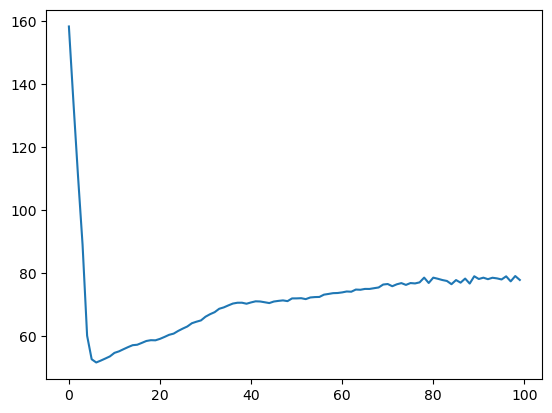

In [54]:
print("MAE: %.2f" % best_mae)
plt.plot(history)
plt.show()

In [35]:
model_nn_06 = nn.Sequential(
    nn.Linear(61, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)
loss_fn = nn.L1Loss()  # mean square error
optimizer = optim.Adam(model_nn_06.parameters(), lr=0.0001)

In [37]:
X_06_train_nn = torch.tensor(X_06_train.to_numpy(), dtype=torch.float32)
y_06_train_nn = torch.tensor(y_06_train.to_numpy(), dtype=torch.float32).reshape(-1, 1)
X_06_test_nn = torch.tensor(X_06_test.to_numpy(), dtype=torch.float32)
y_06_test_nn = torch.tensor(y_06_test.to_numpy(), dtype=torch.float32).reshape(-1, 1)
 
# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 4  # size of each batch
batch_start = torch.arange(0, len(X_06_train_nn), batch_size)
 
# Hold the best model
best_mae = np.inf   # init to infinity
best_weights = None
history = []
 
# training loop
for epoch in range(n_epochs):
    model_nn_06.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_06_train_nn[start:start+batch_size]
            y_batch = y_06_train_nn[start:start+batch_size]
            # forward pass
            y_pred = model_nn_06(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model_nn_06.eval()
    y_pred_nn_06 = model_nn_06(X_06_test_nn)
    mae_nn_06 = loss_fn(y_pred_nn_06, y_06_test_nn)
    mae_nn_06 = float(mae_nn_06)
    history.append(mae_nn_06)
    if mae_nn_06 < best_mae:
        best_mae = mae_nn_06
        best_weights = copy.deepcopy(model_nn_06.state_dict())
model_nn_06.load_state_dict(best_weights)

<All keys matched successfully>

MAE: 258.78


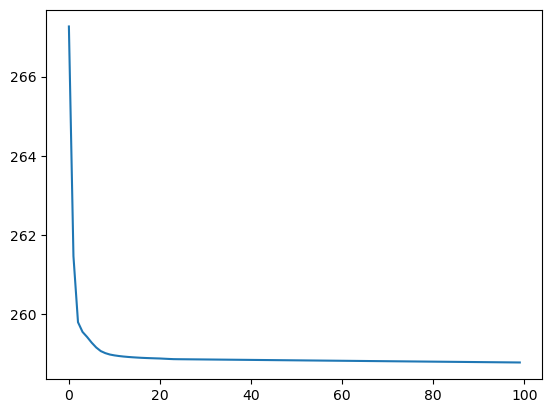

In [38]:
print("MAE: %.2f" % best_mae)
plt.plot(history)
plt.show()

MAE: 258.78


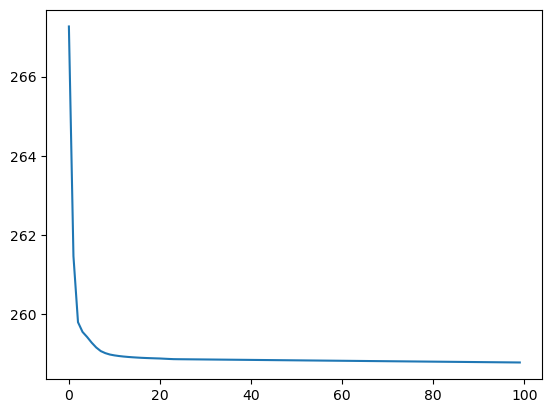

In [39]:
print("MAE: %.2f" % best_mae)
plt.plot(history)
plt.show()

In [44]:
model_cb_04 = CatBoostRegressor(loss_function='RMSE')
model_cb_06 = CatBoostRegressor(loss_function='RMSE')

In [46]:
model_cb_04.fit(X_04_train, y_04_train, verbose=50)

Learning rate set to 0.024904
0:	learn: 89.7071550	total: 169ms	remaining: 2m 49s
50:	learn: 71.3693830	total: 329ms	remaining: 6.12s
100:	learn: 56.1460405	total: 503ms	remaining: 4.48s
150:	learn: 45.1700027	total: 648ms	remaining: 3.64s
200:	learn: 37.8440459	total: 793ms	remaining: 3.15s
250:	learn: 31.3770695	total: 953ms	remaining: 2.84s
300:	learn: 27.0887824	total: 1.1s	remaining: 2.55s
350:	learn: 24.8176758	total: 1.27s	remaining: 2.34s
400:	learn: 23.4175175	total: 1.41s	remaining: 2.1s
450:	learn: 22.7039108	total: 1.55s	remaining: 1.89s
500:	learn: 22.3196087	total: 1.69s	remaining: 1.69s
550:	learn: 22.1363906	total: 1.84s	remaining: 1.5s
600:	learn: 22.0054719	total: 1.98s	remaining: 1.31s
650:	learn: 21.9138845	total: 2.12s	remaining: 1.14s
700:	learn: 21.8798019	total: 2.26s	remaining: 963ms
750:	learn: 21.8601632	total: 2.41s	remaining: 799ms
800:	learn: 21.8516106	total: 2.54s	remaining: 631ms
850:	learn: 21.8461424	total: 2.75s	remaining: 481ms
900:	learn: 21.844163

In [47]:
model_cb_06.fit(X_06_train, y_06_train, verbose=50)

Learning rate set to 0.024904
0:	learn: 88.5510305	total: 3.15ms	remaining: 3.15s
50:	learn: 69.2243764	total: 142ms	remaining: 2.65s
100:	learn: 54.7448933	total: 293ms	remaining: 2.61s
150:	learn: 44.1444870	total: 440ms	remaining: 2.47s
200:	learn: 35.8260229	total: 605ms	remaining: 2.4s
250:	learn: 30.2959478	total: 741ms	remaining: 2.21s
300:	learn: 26.5789414	total: 893ms	remaining: 2.07s
350:	learn: 24.6053252	total: 1.03s	remaining: 1.91s
400:	learn: 23.4197188	total: 1.19s	remaining: 1.77s
450:	learn: 22.6366722	total: 1.32s	remaining: 1.61s
500:	learn: 22.2524963	total: 1.47s	remaining: 1.47s
550:	learn: 22.0647234	total: 1.61s	remaining: 1.31s
600:	learn: 21.9686942	total: 1.76s	remaining: 1.17s
650:	learn: 21.9076239	total: 1.9s	remaining: 1.02s
700:	learn: 21.8794871	total: 2.05s	remaining: 874ms
750:	learn: 21.8617946	total: 2.19s	remaining: 726ms
800:	learn: 21.8525641	total: 2.33s	remaining: 580ms
850:	learn: 21.8475478	total: 2.48s	remaining: 434ms
900:	learn: 21.84494

In [48]:
y_pred_cb_04 = model_cb_04.predict(X_04_test)
mae_score_cb_04 = mean_absolute_error(y_04_test, y_pred_cb_04)
print(f"CatBoost mae on test data 04: {mae_score_cb_04:.3f}")

CatBoost mae on test data 04: 94.972


In [49]:
y_pred_cb_06 = model_cb_06.predict(X_06_test)
mae_score_cb_06 = mean_absolute_error(y_06_test, y_pred_cb_06)
print(f"CatBoost mae on test data 06: {mae_score_cb_06:.3f}")

CatBoost mae on test data 06: 84.261


In [ ]:
X_04_mean = X_04
X_04_mean['mean'] = X_04.mean(axis=1)
X_04_mean['mean_6_30'] = X_04.mean(axis=1)
X_04_mean['mean_30_60'] = X_04.mean(axis=1)

In [ ]:
def processing(dataset_X, dataset_y):
    X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=0.1)
    # linear lasso
    t0 = time()
    lasso = Lasso(alpha=0.14, tol=0.001).fit(X_train, y_train)
    print(f"Lasso fit done in {(time() - t0):.3f}s")
    y_pred_lasso = lasso.predict(X_test)
    mae_score_lasso = mean_absolute_error(y_test, y_pred_lasso)
    print(f"Lasso mae on test data: {mae_score_lasso:.3f}")
    
    # SVR
    t0 = time()
    svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
    svm_model = svr_rbf.fit(X_train, y_train)
    print(f"SVM fit done in {(time() - t0):.3f}s")
    y_pred_svm = svm_model.predict(X_test)
    mae_score_svm = mean_absolute_error(y_test, y_pred_svm)
    print(f"SVM mae on test data: {mae_score_svm:.3f}")
    
    # knn
    t0 = time()
    n_neighbors = 5
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights="uniform")
    knn_model = knn.fit(X_train, y_train)
    print(f"kNN fit done in {(time() - t0):.3f}s")
    y_pred_knn = knn_model.predict(X_test)
    mae_score_knn = mean_absolute_error(y_test, y_pred_knn)
    print(f"kNN mae on test data: {mae_score_knn:.3f}")
    
    # decision tree
    t0 = time()
    dt = tree.DecisionTreeRegressor()
    dt_model = dt.fit(X_train, y_train)
    print(f"DT fit done in {(time() - t0):.3f}s")
    y_pred_dt = dt_model.predict(X_test)
    mae_score_dt = mean_absolute_error(y_test, y_pred_dt)
    print(f"DT mae on test data: {mae_score_dt:.3f}")
    
    # random forest
    t0 = time()
    rf = RandomForestRegressor()
    rf_model = rf.fit(X_train, y_train)
    print(f"RF fit done in {(time() - t0):.3f}s")
    y_pred_rf = rf_model.predict(X_test)
    mae_score_rf = mean_absolute_error(y_test, y_pred_rf)
    print(f"RF mae on test data: {mae_score_rf:.3f}")
    
    # fully connected NN
    model_nn = nn.Sequential(
    nn.Linear(len(dataset_X.columns), 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1))
    loss_fn = nn.L1Loss()  # mean square error
    optimizer = optim.Adam(model_nn.parameters(), lr=0.0001)
    
    X_train_nn = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
    y_train_nn = torch.tensor(y_train.to_numpy(), dtype=torch.float32).reshape(-1, 1)
    X_test_nn = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
    y_test_nn = torch.tensor(y_test.to_numpy(), dtype=torch.float32).reshape(-1, 1)
 
    # training parameters
    n_epochs = 100   # number of epochs to run
    batch_size = 4  # size of each batch
    batch_start = torch.arange(0, len(X_train_nn), batch_size)
 
    # Hold the best model
    best_mae = np.inf   # init to infinity
    best_weights = None
    history = []
 
    # training loop
    for epoch in range(n_epochs):
        model_nn.train()
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:
                # take a batch
                X_batch = X_train_nn[start:start+batch_size]
                y_batch = y_train_nn[start:start+batch_size]
                # forward pass
                y_pred = model_nn(X_batch)
                loss = loss_fn(y_pred, y_batch)
                # backward pass
                optimizer.zero_grad()
                loss.backward()
                # update weights
                optimizer.step()
                # print progress
                bar.set_postfix(mse=float(loss))
        # evaluate accuracy at end of each epoch
        model_nn.eval()
        y_pred_nn = model_nn(X_test_nn)
        mae_nn = loss_fn(y_pred_nn, y_test_nn)
        mae_nn = float(mae_nn)
        history.append(mae_nn)
        if mae_nn < best_mae:
            best_mae = mae_nn
            best_weights = copy.deepcopy(model_nn.state_dict())
    model_nn.load_state_dict(best_weights)
    print("MAE: %.2f" % best_mae)
    
    # catboost
    model_cb = CatBoostRegressor(loss_function='RMSE')
    model_cb.fit(X_train, y_train, verbose=50)
    y_pred_cb = model_cb.predict(X_test)
    mae_score_cb = mean_absolute_error(y_test, y_pred_cb)
    print(f"CatBoost mae on test data: {mae_score_cb:.3f}")